In [4]:
import pandas as pd
import regex as re
import statistics
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
import json
import sys
sys.path.append('../bgc-analysis')
from  calc_sensor import pH_sbe, o2_sbe
import numpy as np
from datetime import datetime
from db_api import get_continuous_one_profile,get_continuous_one_float
from get_cal_sn import get_cal
from calc_sensor import pH_sbe
import openpyxl

In [8]:
SN = 1528       #UPDATE FOR EACH FLOAT
meta = get_cal(SN)
pcal = meta["CTD_PRES"].PREDEPLOYMENT_CALIB_COEFFICIENT
tcal = meta["CTD_TEMP"].PREDEPLOYMENT_CALIB_COEFFICIENT
scal = meta["CTD_CNDC"].PREDEPLOYMENT_CALIB_COEFFICIENT



                                                                          CTD_CNDC  \
SENSOR_MAKER                                                                   SBE   
SENSOR_MODEL                                                        SBE41CP_V5.3.5   
SENSOR_SERIAL_NO                                                             18947   
SENSOR_CALIB_DATE                                                       2023-03-12   
COMMENTS                                                                      None   
PREDEPLOYMENT_CALIB_EQUATION                                         {'eq1': None}   
PREDEPLOYMENT_CALIB_COEFFICIENT  {'G': -1.01677, 'H': 0.1431673, 'I': -0.000169...   

                                                                          CTD_PRES  \
SENSOR_MAKER                                                                 DRUCK   
SENSOR_MODEL                                                        DRUCK_2900PSIA   
SENSOR_SERIAL_NO                                     

In [12]:

filelocation = 'G:\\Shared drives\WHOI Argo\BGC\Float Tracking\pressure_test_results\\' + 'combined_test_results' + '\\' + str(SN) + '_pressure_test_results' + ".xlsx"
dff = pd.read_excel(filelocation)

temp = dff['TEMP']
print(temp)
pressure = dff['PRES']
print(pressure)
sal = dff['PSAL']
print(sal)
time = dff['DATE']
print(time)


0       20.9445
1       20.9282
2       20.9193
3       20.9089
4       20.9000
         ...   
1339    20.7613
1340    20.8087
1341    20.8521
1342    20.8938
1343    20.7308
Name: TEMP, Length: 1344, dtype: float64
0       1965.0
1       1929.3
2       1904.8
3       1878.5
4       1851.3
         ...  
1339    1413.3
1340    1601.5
1341    1787.3
1342    1975.5
1343    1446.6
Name: PRES, Length: 1344, dtype: float64
0       32.704
1       32.707
2       32.707
3       32.708
4       32.707
         ...  
1339    32.752
1340    32.752
1341    32.752
1342    32.753
1343    32.749
Name: PSAL, Length: 1344, dtype: float64
0      2023-05-17 11:18:38
1      2023-05-17 11:20:06
2      2023-05-17 11:21:01
3      2023-05-17 11:21:55
4      2023-05-17 11:22:50
               ...        
1339   2023-05-18 12:48:23
1340   2023-05-18 12:49:18
1341   2023-05-18 12:50:12
1342   2023-05-18 12:51:07
1343   2023-05-18 12:52:01
Name: DATE, Length: 1344, dtype: datetime64[ns]


Text(0, 0.5, 'Pressure (dbar)')

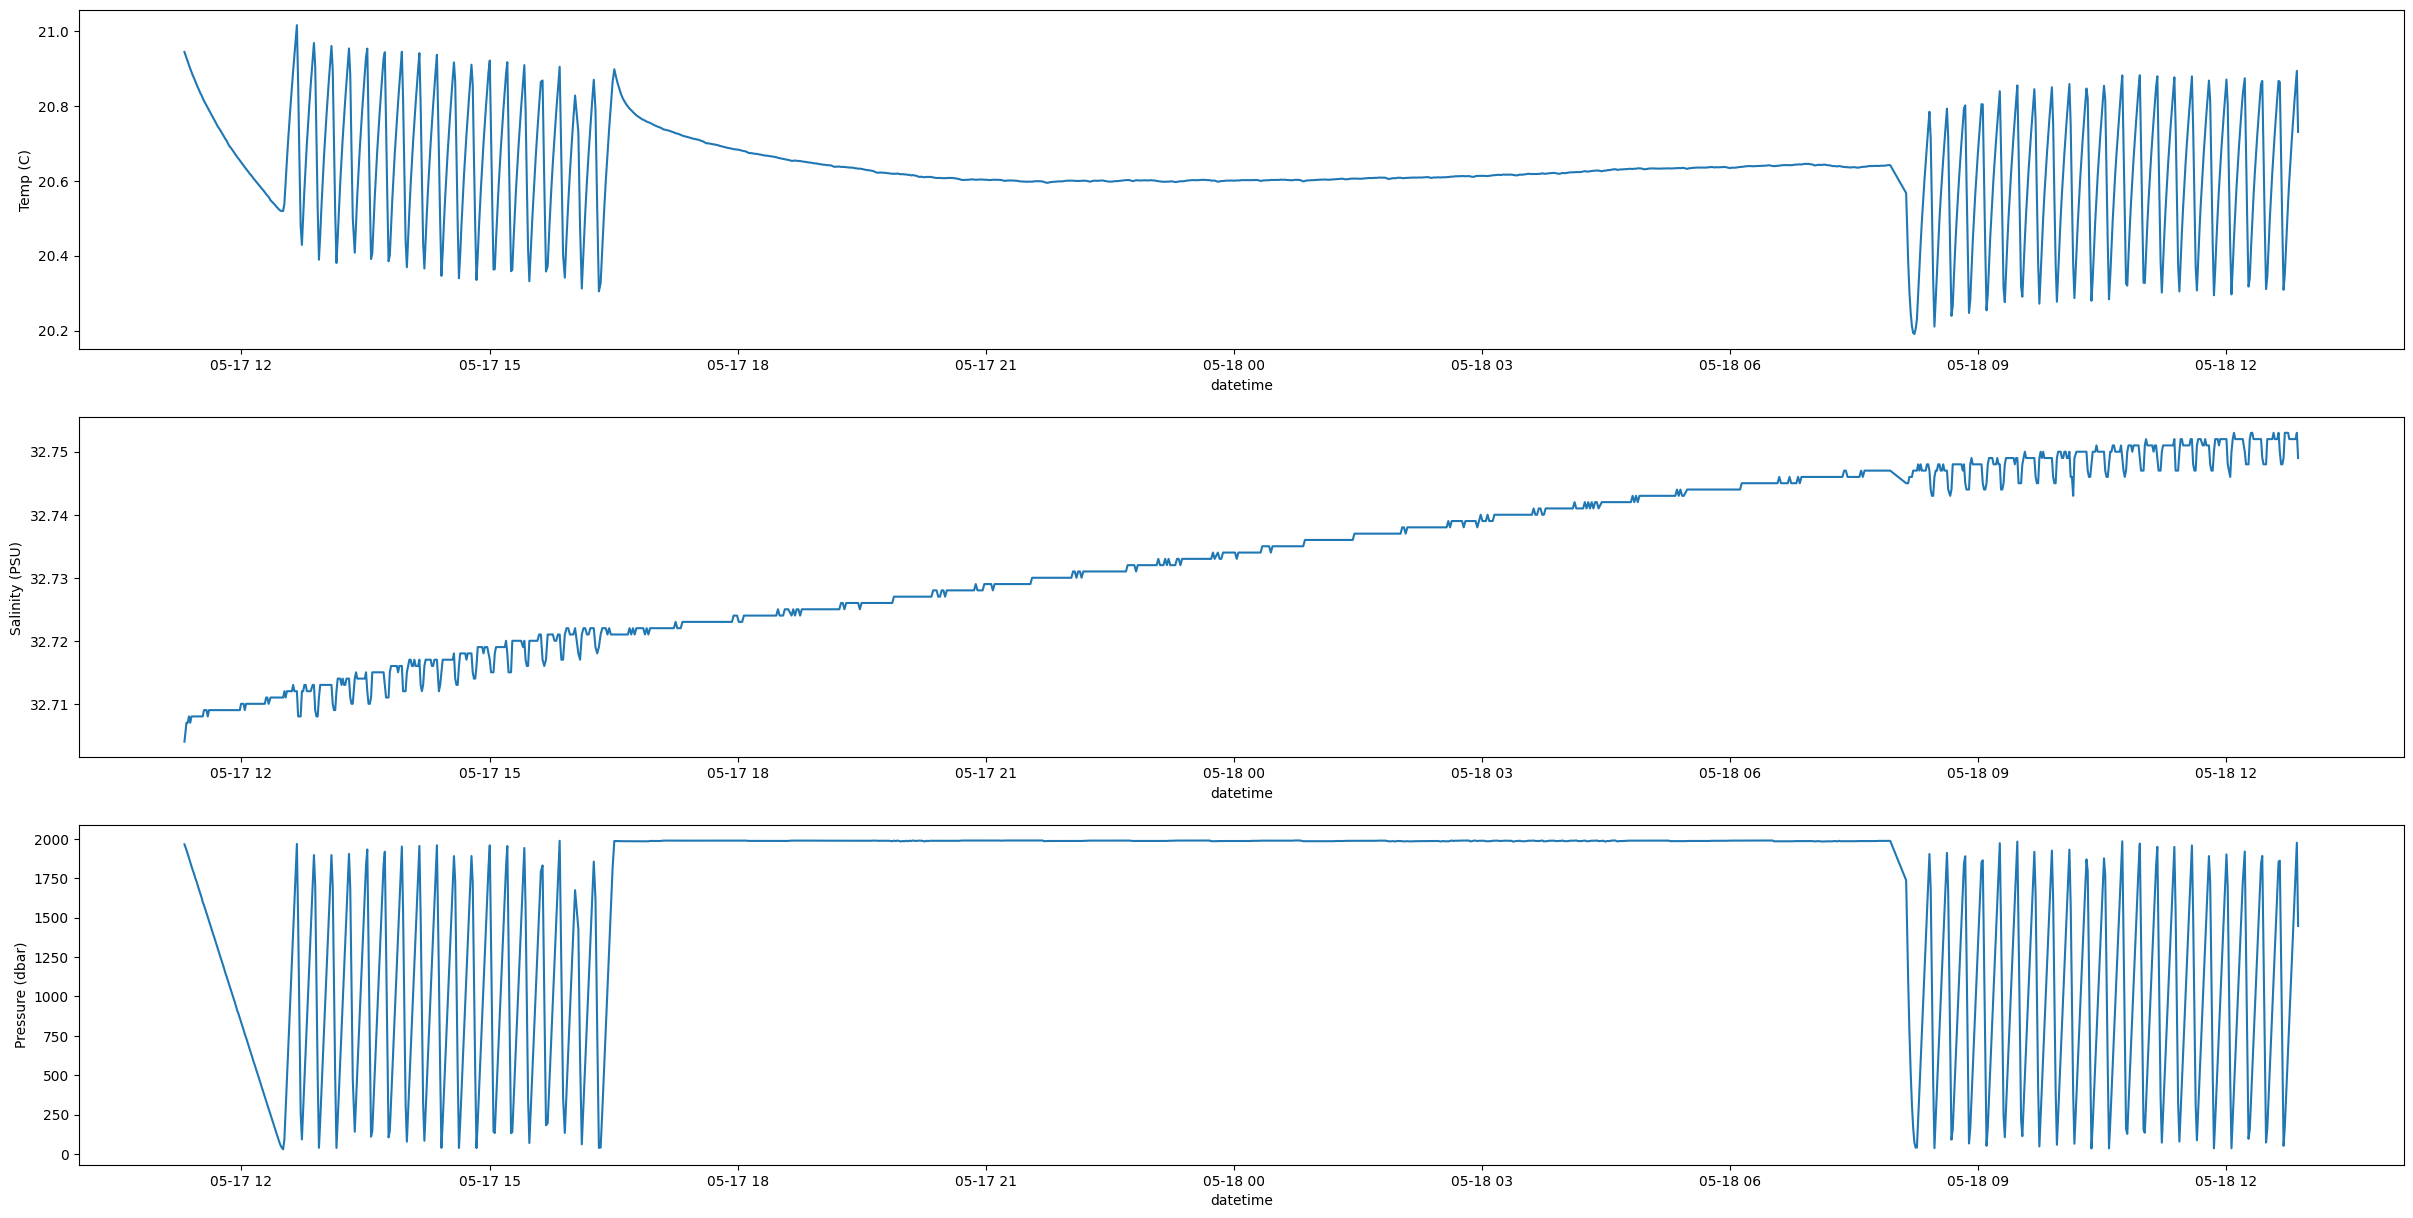

In [23]:
fig, ax = plt.subplots(3,1, figsize = (30, 15))
ax[0].plot(time,temp)
ax[1].plot(time,sal)
ax[2].plot(time,pressure)
ax[0].set_xlabel('datetime')
ax[0].set_ylabel('Temp (C)')
ax[1].set_xlabel('datetime')
ax[1].set_ylabel('Salinity (PSU)')
ax[2].set_xlabel('datetime')
ax[2].set_ylabel('Pressure (dbar)')